<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Merging" data-toc-modified-id="Merging-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Merging</a></span></li></ul></li><li><span><a href="#MAG-summary" data-toc-modified-id="MAG-summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MAG summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#TUK-summary" data-toc-modified-id="TUK-summary-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>TUK summary</a></span></li></ul></li></ul></li><li><span><a href="#Overlap-with-cophylo-species" data-toc-modified-id="Overlap-with-cophylo-species-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Overlap with cophylo species</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Filtering-by-host-phylo-samples-&amp;-infant-samples" data-toc-modified-id="Filtering-by-host-phylo-samples-&amp;-infant-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Filtering by host phylo samples &amp; infant samples</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#LLGenPhy" data-toc-modified-id="LLGenPhy-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LLGenPhy</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#MAGs-per-(species,-sample)" data-toc-modified-id="MAGs-per-(species,-sample)-8.0.2"><span class="toc-item-num">8.0.2&nbsp;&nbsp;</span>MAGs per <code>(species, sample)</code></a></span></li></ul></li><li><span><a href="#Adult" data-toc-modified-id="Adult-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Adult</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#--WAITING--" data-toc-modified-id="--WAITING---9"><span class="toc-item-num">9&nbsp;&nbsp;</span>--WAITING--</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-9.0.1"><span class="toc-item-num">9.0.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* LLGenPhy run on all relevant MAGs for HUBIF, TUK, CAM, and KOR datasets
  * Createing per-clade genome phylogenies

# Var

In [1]:
# workdir
work_dir = '/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/'

# MAG summary files
cophylo_file = file.path(work_dir, 'cophylo_MAG_meta.tsv')
Even2021_file =  file.path(work_dir, 'Even2021_MAG_meta.tsv')
Lokmer2019_file = file.path(work_dir, 'Lokmer2019_MAG_meta.tsv')
TUK_anx_file = file.path(work_dir, 'TUK-anx_MAG_meta.tsv')
korean_file = file.path(work_dir, 'Korean_MAG_meta.tsv')

# sample info
## adult phylo samples
host_phylo_samps_file = file.path(work_dir, 'host_phylo_samples.tsv')
## infant
infant_samp_file = '/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/SampleInfoInfants.tsv'

# cophylogeny info
cophy_dir = '/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/'
cophylo_adult_spec_file = file.path(cophy_dir, 'cophylo_species', 'AdultBetweenPop_species.tsv')
cophylo_infant_spec_file = file.path(cophy_dir, 'cophylo_species', 'InfantResults_species.txt')

# TUK sample info
TUK_samp_meta_file = '/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/metadata/study-n5_samples-metadata.tsv'

# params
threads = 4

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [5]:
df.dims()
setDTthreads(threads)

# Load

In [6]:
# species
cophylo_spec = list(
    Fread(cophylo_adult_spec_file) %>%
        mutate.(age_group = 'adult'),
    Fread(cophylo_infant_spec_file) %>%
        mutate.(age_group = 'infant')
    ) %>%
    rbindlist(use.names=TRUE) %>%
    separate.(lineage, taxonomy_levels(), sep=';') %>%
    mutate.(Species = gsub('^s__', '', Species))
cophylo_spec

ncbi_taxonomy,gtdb_taxonomy,lca_frac,target_tax_level,age_group,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s__Catenibacterium_mitsuokai,s__Catenibacterium mitsuokai,1,species,adult,d__bacteria,p__firmicutes,c__bacilli,o__erysipelotrichales,f__erysipelatoclostridiaceae,g__catenibacterium,catenibacterium mitsuokai
s__Eubacterium_sp_CAG_251,s__Eubacterium_R sp000436835,1,species,adult,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Eubacterium_R,Eubacterium_R sp000436835
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__Escherichia_coli,g__Escherichia,0.99,genus,infant,d__bacteria,p__proteobacteria,c__gammaproteobacteria,o__enterobacterales,f__enterobacteriaceae,g__escherichia,NA
s__Streptococcus_salivarius,g__Streptococcus,1.00,genus,infant,d__bacteria,p__firmicutes,c__bacilli,o__lactobacillales,f__streptococcaceae,g__streptococcus,NA


In [7]:
# adult samples
host_phylo_samps = Fread(host_phylo_samps_file)
host_phylo_samps

Sample,Read1,Read2
<chr>,<chr>,<chr>
ERR2619707,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Lokmeretal2019_n57/llmgqc_output/final/ERR2619707/R1_final.fq.gz,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Lokmeretal2019_n57/llmgqc_output/final/ERR2619707/R2_final.fq.gz
ERR2619708,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Lokmeretal2019_n57/llmgqc_output/final/ERR2619708/R1_final.fq.gz,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Lokmeretal2019_n57/llmgqc_output/final/ERR2619708/R2_final.fq.gz
⋮,⋮,⋮
S1995_plate1_C01,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Korean_data/llmgqc_output/Korea_output/final/S1995_plate1_C01/R1_final.fq.gz,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Korean_data/llmgqc_output/Korea_output/final/S1995_plate1_C01/R2_final.fq.gz
S1252_plate1_B01,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Korean_data/llmgqc_output/Korea_output/final/S1252_plate1_B01/R1_final.fq.gz,/ebio/abt3_projects/HUBIF_metagenomics/data/metagenomes/cophylogeny/supplementary_metagenomes/Korean_data/llmgqc_output/Korea_output/final/S1252_plate1_B01/R2_final.fq.gz


In [8]:
# infant samples
infant_samps = Fread(infant_samp_file)
infant_samps

dataset_name,subjectID,country,age..months.,gender,body_site,sequencing_platform,number_reads
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
current study,G0007,Gabon,0.75,M,stool,Illumina HiSeq,45377
current study,G0009,Gabon,0.50,F,stool,Illumina HiSeq,30443
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
current study,V435,Vietnam,7,M,stool,Illumina HiSeq,29982
current study,V439,Vietnam,8,M,stool,Illumina HiSeq,1042091


In [9]:
# merging sample info
samps = rbindlist(list(
    host_phylo_samps %>% 
        select.(Sample) %>% 
        mutate.(age_group = 'adult'),
    infant_samps %>% 
        rename.('Sample' = subjectID) %>% 
        select.(Sample) %>% 
    mutate.(age_group = 'infant')
))
samps$age_group %>% table
samps

.
 adult infant 
   839    386 

Sample,age_group
<chr>,<chr>
ERR2619707,adult
ERR2619708,adult
⋮,⋮
V435,infant
V439,infant


In [10]:
# MAGs
cophylo_MAGs = Fread(cophylo_file) %>%
    rename.(Name = 'genome') %>%
    select.(Name, Fasta, Completeness, Contamination,
            Phylum, Class, Order, Family, Genus, Species,
            Sample) %>%
    mutate.(Dataset = 'cophylo')
cophylo_MAGs$Name %>% unique_n('MAGs')
cophylo_MAGs

No. of unique MAGs: 6234 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G0030__maxbin2__High_033,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0030__maxbin2__High.033.fna,96.63,0,p__Elusimicrobiota,c__Elusimicrobia,o__Elusimicrobiales,f__Elusimicrobiaceae,g__UBA1436,s__UBA1436 sp900541355,G0030,cophylo
G0051__maxbin2__High_031,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0051__maxbin2__High.031.fna,96.63,0,p__Elusimicrobiota,c__Elusimicrobia,o__Elusimicrobiales,f__Elusimicrobiaceae,g__UBA1436,s__UBA1436 sp900541355,G0051,cophylo
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
T126__maxbin2__High_017,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/T126__maxbin2__High.017.fna,82.96,2.81,p__Firmicutes,c__Bacilli,o__RFN20,f__CAG-288,g__CAG-345,s__CAG-345 sp000433315,T126,cophylo
T173__metabat2__High_004,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/T173__metabat2__High.004.fna,96.63,0.00,p__Firmicutes,c__Bacilli,o__RFN20,f__CAG-288,g__CAG-345,s__CAG-345 sp000433315,T173,cophylo


In [11]:
# MAGs
Lokmer2019_MAGs = Fread(Lokmer2019_file) %>%
    select.(Name, Fasta, Completeness, Contamination,
            Phylum, Class, Order, Family, Genus, Species) %>%
    mutate.(Sample = gsub('__.+', '', Name)) %>%
    mutate.(Dataset = 'Lokmer2019') 
Lokmer2019_MAGs$Name %>% unique_n('MAGs')
Lokmer2019_MAGs

No. of unique MAGs: 1097 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR2619709__metabat2__HighNoCov_056,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__HighNoCov.056.fna,99.05,0.04,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia flexneri,ERR2619709,Lokmer2019
ERR2619709__metabat2__Low_054_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__Low.054_sub.fna,68.77,1.12,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__CAG-272,g__CAG-448,s__CAG-448 sp003150135,ERR2619709,Lokmer2019
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERR2619740__metabat2__Low_012,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619740__metabat2__Low.012.fna,96.91,0.81,p__Thermoplasmatota,c__Thermoplasmata,o__Methanomassiliicoccales,f__Methanomethylophilaceae,g__UBA71,s__UBA71 sp006954465,ERR2619740,Lokmer2019
ERR2619721__metabat2__HighNoCov_018,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619721__metabat2__HighNoCov.018.fna,96.37,0.81,p__Thermoplasmatota,c__Thermoplasmata,o__Methanomassiliicoccales,f__Methanomethylophilaceae,g__UBA71,s__UBA71 sp006954465,ERR2619721,Lokmer2019


In [12]:
# MAGs
Even2021_MAGs = Fread(Even2021_file) %>%
    select.(Name, Fasta, Completeness, Contamination,
            Phylum, Class, Order, Family, Genus, Species) %>%
    mutate.(Sample = gsub('__.+', '', Name)) %>%
    mutate.(Dataset = 'Even2021')
Even2021_MAGs$Name %>% unique_n('MAGs')
Even2021_MAGs

No. of unique MAGs: 4352 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BEB01__maxbin2__High_038,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/evenetal2021/round1/llg_output/drep/drep/dereplicated_genomes/BEB01__maxbin2__High_038.fna,99.55,0.60,p__Actinobacteriota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium pseudocatenulatum,BEB01,Even2021
BEB01__maxbin2__Low_022,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/evenetal2021/round1/llg_output/drep/drep/dereplicated_genomes/BEB01__maxbin2__Low_022.fna,51.88,0.24,p__Firmicutes,c__Bacilli,o__Erysipelotrichales,f__Erysipelatoclostridiaceae,g__Erysipelatoclostridium,s__Erysipelatoclostridium sp000752095,BEB01,Even2021
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
BEN59__maxbin2__High_010,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/evenetal2021/round1/llg_output/drep/drep/dereplicated_genomes/BEN59__maxbin2__High_010.fna,71.22,0.0,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,BEN59,Even2021
BEN07__vamb__Med_803,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/evenetal2021/round1/llg_output/drep/drep/dereplicated_genomes/BEN07__vamb__Med_803.fna,73.11,0.4,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,BEN07,Even2021


In [13]:
# MAGs
TUK_anx_MAGs = Fread(TUK_anx_file) %>%
    select.(Name, Fasta, Completeness, Contamination,
            Phylum, Class, Order, Family, Genus, Species) %>%
    mutate.(Sample = gsub('__.+', '', Name)) %>%
    mutate.(Dataset = 'TUK-anx')
TUK_anx_MAGs$Name %>% unique_n('MAGs')
TUK_anx_MAGs

No. of unique MAGs: 12358 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1002320__metabat2__HighNoCov_035,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002320__metabat2__HighNoCov.035.fna,92.2,4.61,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Tidjanibacter,s__Tidjanibacter inops,1002320,TUK-anx
1002335__maxbin2__High_035,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002335__maxbin2__High.035.fna,100.0,0.00,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes_A,s__Alistipes_A ihumii,1002335,TUK-anx
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1006102__vamb__Med_320,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1006102__vamb__Med.320.fna,57.03,0,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,1006102,TUK-anx
ERR3450849__maxbin2__High_030,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/ERR3450849__maxbin2__High.030.fna,100.00,0,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,ERR3450849,TUK-anx


In [14]:
# TUK sample info
TUK_samp_meta = Fread(TUK_samp_meta_file) %>%
    select.(Dataset, Sample)
TUK_samp_meta

Dataset,Sample
<chr>,<chr>
BGI250,1002748
BGI250,1002731
⋮,⋮
vadinCA11,1012661
vadinCA11,1012086


In [15]:
# MAGs
korean_MAGs = Fread(korean_file) %>%
    select.(Name, Fasta, Completeness, Contamination,
            Phylum, Class, Order, Family, Genus, Species) %>%
    mutate.(Sample = gsub('__.+', '', Name)) %>%
    mutate.(Dataset = 'Korean')
korean_MAGs$Name %>% unique_n('MAGs')
korean_MAGs

No. of unique MAGs: 564 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
S1017_plate1_A06__metabat2__Med_011,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1017_plate1_A06__metabat2__Med_011.fna,92.44,0.89,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Coprococcus,s__Coprococcus eutactus_A,S1017_plate1_A06,Korean
S1031_plate1_E09__metabat2__High_014_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1031_plate1_E09__metabat2__High_014_sub.fna,98.24,0.00,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Lachnospira,s__Lachnospira eligens_B,S1031_plate1_E09,Korean
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S3357_plate1_E04__metabat2__Med_001,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S3357_plate1_E04__metabat2__Med_001.fna,67.01,1.6,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,S3357_plate1_E04,Korean
S892_plate1_F09__metabat2__LowNoCov_010_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S892_plate1_F09__metabat2__LowNoCov_010_sub.fna,94.00,0.4,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,S892_plate1_F09,Korean


## Merging

In [16]:
# merging MAG data.tables
MAGs = rbindlist(list(
    cophylo_MAGs,
    Lokmer2019_MAGs,
    Even2021_MAGs,
    TUK_anx_MAGs,
    korean_MAGs),
    use.names=TRUE)
MAGs$Name %>% unique_n('MAGs')
MAGs

No. of unique MAGs: 24605 


Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G0030__maxbin2__High_033,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0030__maxbin2__High.033.fna,96.63,0,p__Elusimicrobiota,c__Elusimicrobia,o__Elusimicrobiales,f__Elusimicrobiaceae,g__UBA1436,s__UBA1436 sp900541355,G0030,cophylo
G0051__maxbin2__High_031,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0051__maxbin2__High.031.fna,96.63,0,p__Elusimicrobiota,c__Elusimicrobia,o__Elusimicrobiales,f__Elusimicrobiaceae,g__UBA1436,s__UBA1436 sp900541355,G0051,cophylo
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S3357_plate1_E04__metabat2__Med_001,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S3357_plate1_E04__metabat2__Med_001.fna,67.01,1.6,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,S3357_plate1_E04,Korean
S892_plate1_F09__metabat2__LowNoCov_010_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S892_plate1_F09__metabat2__LowNoCov_010_sub.fna,94.00,0.4,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A smithii,S892_plate1_F09,Korean


# MAG summary

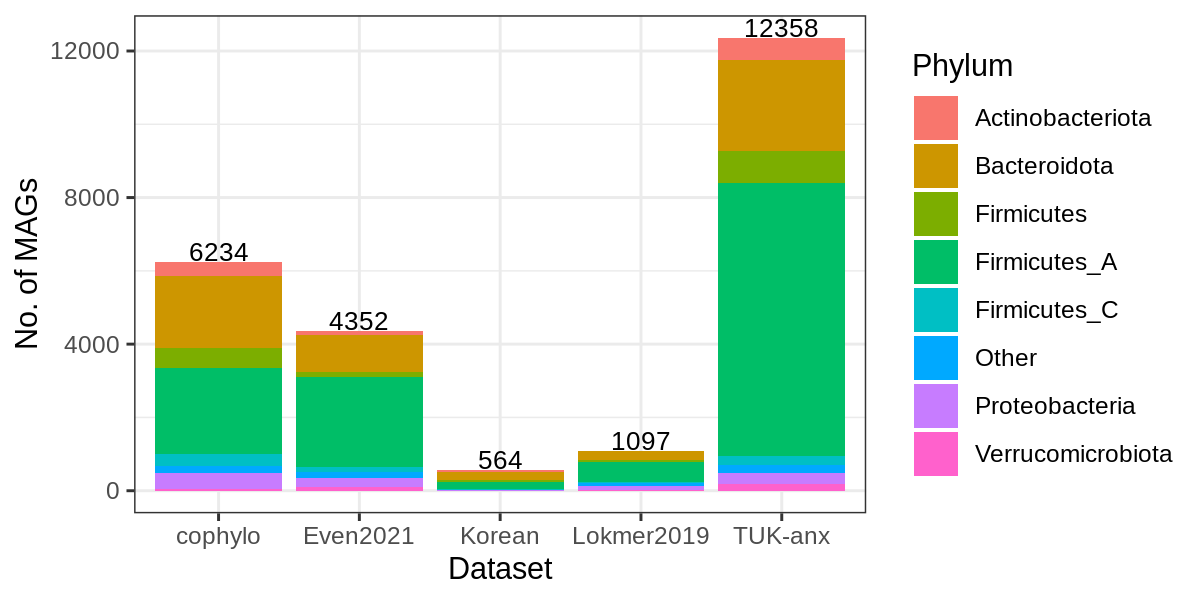

In [17]:
# by taxonomy
X = MAGs %>%
    summarize.(n = n.(),
               .by=c(Dataset))

p = MAGs %>%
    mutate.(total_MAGs = n.()) %>%    
    mutate.(perc = n.() / total_MAGs * 100,
            .by=c(Phylum, total_MAGs)) %>%
    mutate.(taxonomy = ifelse(perc < 1, 'Other', Phylum)) %>%
    summarize.(n = n.(),
               .by=c(Dataset, taxonomy)) %>%
    mutate.(taxonomy = gsub('^p__', '', taxonomy)) %>%
    ggplot(aes(Dataset, n)) +
    geom_bar(aes(fill=taxonomy), stat='identity') +
    geom_text(data=X, aes(label=n), vjust=-0.05, size=3.3) +
    scale_fill_discrete('Phylum') +
    labs(y='No. of MAGs') +
    theme_bw()
p.dims(6,3)
plot(p)

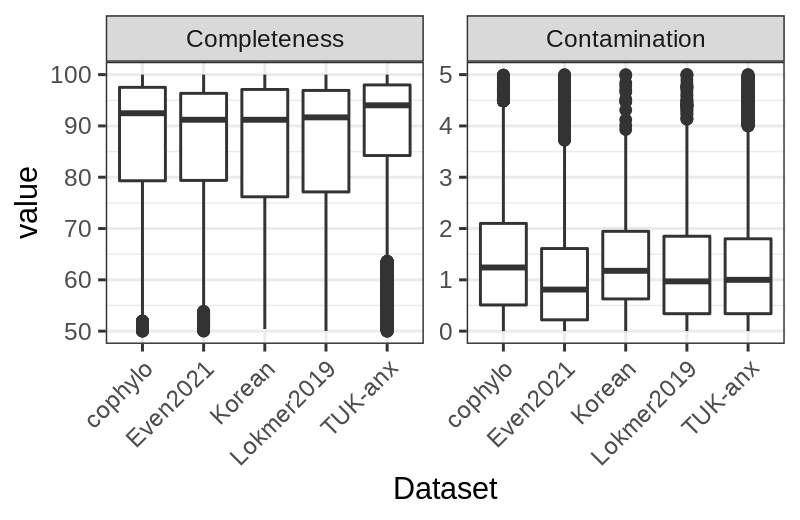

In [18]:
# checkM
p = MAGs %>%
    select.(Dataset, Completeness, Contamination) %>%
    pivot_longer.(cols=c(-Dataset)) %>%
    ggplot(aes(Dataset, value)) +
    geom_boxplot() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,2.6)
plot(p)

In [19]:
# number of MAGs per sample
MAGs_s = MAGs %>%
    summarize.(n = n.(),
               .by=c(Sample)) 
MAGs_s$n %>% summary_x('MAGs per sample')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
MAGs per sample,1,4,10,16.37059,24,90,33.283,13.588


In [20]:
# multiple MAGs from 1 species per host?
MAGs_s = MAGs %>%
    filter.(Species != 's__') %>%
    summarize.(n = n.(),
               .by=c(Species, Sample)) 
MAGs_s$n %>% summary_x('MAGs per species per host')
MAGs_s %>% 
    filter.(n > 1) 

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
MAGs per species per host,1,1,1,1,1,1,0,0


Species,Sample,n
<chr>,<chr>,<int>


### TUK summary

In [21]:
MAGs_f = MAGs %>%
    filter.(Dataset == 'TUK-anx') %>%
    inner_join.(TUK_samp_meta, c('Sample'))
MAGs_f

Name,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,i.Dataset
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1002748__vamb__Low_032,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002748__vamb__Low.032.fna,96.62,1.58,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__KLE1615,s__KLE1615 sp900066985,1002748,TUK-anx,BGI250
1002748__vamb__Med_283,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002748__vamb__Med.283.fna,83.47,2.31,p__Firmicutes,c__Bacilli,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Holdemanella,s__Holdemanella sp002299315,1002748,TUK-anx,BGI250
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1012086__maxbin2__High_023,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1012086__maxbin2__High.023.fna,99.33,0.06,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Butyrivibrio_A,s__Butyrivibrio_A crossotus,1012086,TUK-anx,vadinCA11
1012086__metabat2__Med_023,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1012086__metabat2__Med.023.fna,66.10,0.11,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Ruminococcaceae,g__Ruminiclostridium_E,s__Ruminiclostridium_E siraeum,1012086,TUK-anx,vadinCA11


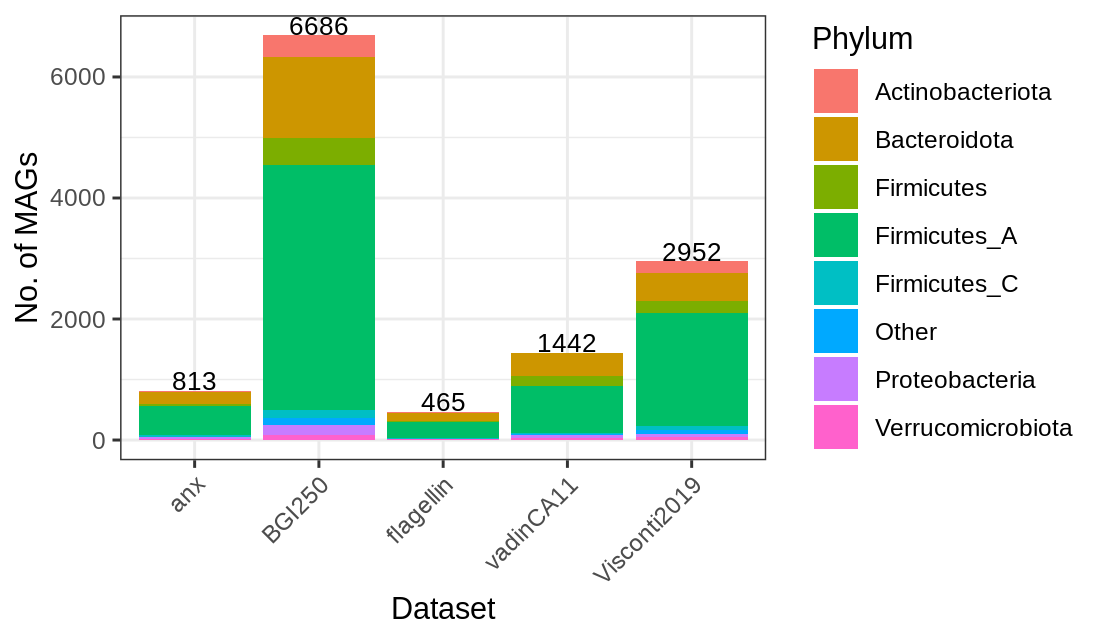

In [22]:
# by taxonomy
X = MAGs_f %>%
    summarize.(n = n.(),
               .by=c(i.Dataset))

p = MAGs_f %>%
    mutate.(total_MAGs = n.()) %>%    
    mutate.(perc = n.() / total_MAGs * 100,
            .by=c(Phylum, total_MAGs)) %>%
    mutate.(taxonomy = ifelse(perc < 1, 'Other', Phylum)) %>%
    summarize.(n = n.(),
               .by=c(i.Dataset, taxonomy)) %>%
    mutate.(taxonomy = gsub('^p__', '', taxonomy)) %>%
    ggplot(aes(i.Dataset, n)) +
    geom_bar(aes(fill=taxonomy), stat='identity') +
    geom_text(data=X, aes(label=n), vjust=-0.05, size=3.3) +
    scale_fill_discrete('Phylum') +
    labs(x='Dataset', y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(5.5,3.2)
plot(p)

# Overlap with cophylo species

* Just those that overlap with Strainphlan cophylo species

In [23]:
# checking overlap
overlap(stringr::str_to_lower(cophylo_spec$Species), 
        stringr::str_to_lower(MAGs$Species) %>% gsub('^s__', '', .))

intersect(x,y): 39 
setdiff(x,y): 3 
setdiff(y,x): 1143 
union(x,y): 1185 


In [24]:
# which target species not found?
overlap(stringr::str_to_lower(cophylo_spec$Species), 
        stringr::str_to_lower(MAGs$Species) %>% gsub('^s__', '', .),
        diff='x') %>% sort

[1] "bifidobacterium kashiwanohense" "dysosmobacter sp001916835"

In [25]:
# filtering to just co-phylo species
MAGs_f = MAGs %>%
    mutate.(spec = stringr::str_to_lower(gsub('^s__', '', Species))) %>%
    semi_join.(cophylo_spec %>%
                    mutate.(spec = stringr::str_to_lower(Species)) %>%
                    distinct.(spec, age_group),
               by=c('spec')) %>%
    rename.('genome' = Name)
MAGs_f$genome %>% unique_n('MAGs')
MAGs_f$Dataset %>% table
MAGs_f

No. of unique MAGs: 6124 


.
   cophylo   Even2021     Korean Lokmer2019    TUK-anx 
      2102        483        235         87       3217 

genome,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,spec
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G0018__metabat2__Low_017,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0018__metabat2__Low.017.fna,91.91,3.56,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella copri,G0018,cophylo,prevotella copri
G0023__metabat2__Low_016,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/G0023__metabat2__Low.016.fna,93.51,2.36,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella copri,G0023,cophylo,prevotella copri
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S633_plate1_B06__maxbin2__Low_001,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S633_plate1_B06__maxbin2__Low_001.fna,64.69,2.20,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,s__Alistipes putredinis,S633_plate1_B06,Korean,alistipes putredinis
S68_plate1_A05__maxbin2__Low_003_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S68_plate1_A05__maxbin2__Low_003_sub.fna,89.20,1.44,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides uniformis,S68_plate1_A05,Korean,bacteroides uniformis


## Summary

In [26]:
MAGs_f$Dataset %>% table
MAGs_f$genome %>% unique_n('MAGs')
summary_x(MAGs_f$Completeness)
summary_x(MAGs_f$Contamination)

.
   cophylo   Even2021     Korean Lokmer2019    TUK-anx 
      2102        483        235         87       3217 

No. of unique MAGs: 6124 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Completeness,50.13,88.42,96.185,90.93676,98.43,100,18.763,7.66


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Contamination,0,0.36,0.97,1.226546,1.86,5,1.803,0.736


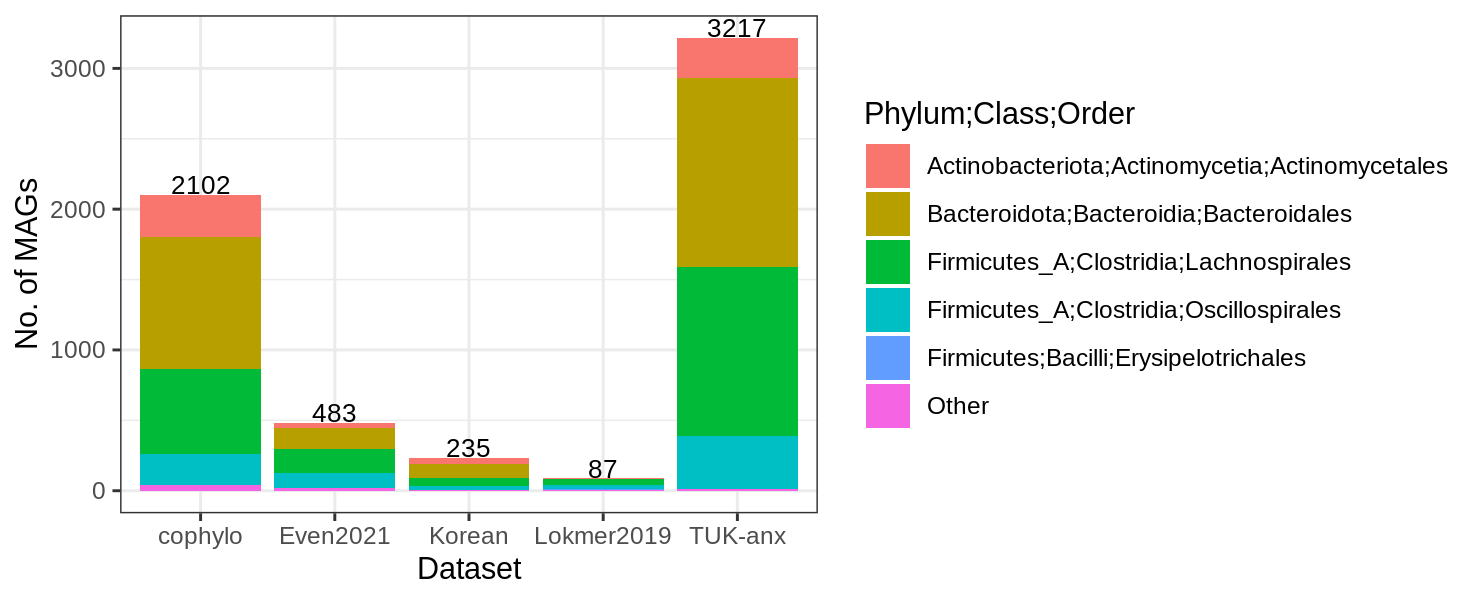

In [27]:
# by taxonomy
X = MAGs_f %>%
    summarize.(n = n.(),
               .by=c(Dataset))

p = MAGs_f %>%
    mutate.(total_MAGs = n.(),
            .by=c(Dataset)) %>%    
    mutate.(perc = n.() / total_MAGs * 100,
            .by=c(Dataset, Phylum, total_MAGs)) %>%
    mutate.(taxonomy = ifelse(perc < 5, 'Other', 
                              paste(Phylum, Class, Order, sep=';'))) %>%
    summarize.(n = n.(),
               .by=c(Dataset, taxonomy)) %>%
    mutate.(taxonomy = gsub('[pco]__', '', taxonomy)) %>%
    ggplot(aes(Dataset, n)) +
    geom_bar(aes(fill=taxonomy), stat='identity') +
    geom_text(data=X, aes(label=n), vjust=-0.05, size=3.3) +
    scale_fill_discrete('Phylum;Class;Order') +
    labs(y='No. of MAGs') +
    theme_bw()
p.dims(7.3,3)
plot(p)

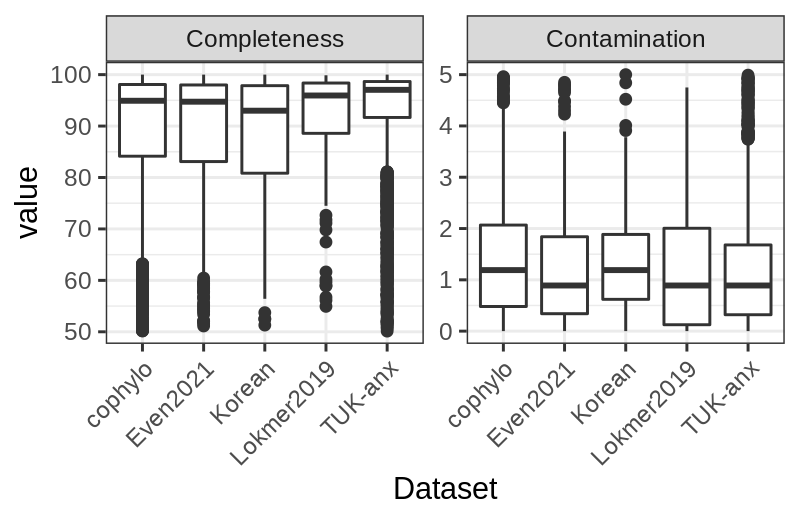

In [28]:
p = MAGs_f %>%
    select.(Dataset, Completeness, Contamination) %>%
    pivot_longer.(cols=c(-Dataset)) %>%
    ggplot(aes(Dataset, value)) +
    geom_boxplot() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,2.6)
plot(p)

# Filtering by host phylo samples & infant samples

In [29]:
# overlap with sample names
overlap(samps$Sample, MAGs_f$Sample)
# filtering to just host phylo
MAGs_f = MAGs_f %>%
    inner_join.(samps, c('Sample')) 
MAGs_f$genome %>% unique_n('MAGs')
MAGs_f

intersect(x,y): 992 
setdiff(x,y): 233 
setdiff(y,x): 353 
union(x,y): 1578 
No. of unique MAGs: 3468 


genome,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,spec,age_group
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR2619708__metabat2__Low_034_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619708__metabat2__Low.034_sub.fna,88.55,0.96,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Eubacterium_R,s__Eubacterium_R sp000436835,ERR2619708,Lokmer2019,eubacterium_r sp000436835,adult
ERR2619709__metabat2__High_009_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__High.009_sub.fna,96.02,2.68,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__CAG-180,s__CAG-180 sp000432435,ERR2619709,Lokmer2019,cag-180 sp000432435,adult
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
V431__metabat2__Low_004,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/V431__metabat2__Low.004.fna,96.82,0.77,p__Actinobacteriota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium pseudocatenulatum,V431,cophylo,bifidobacterium pseudocatenulatum,infant
V439__metabat2__High_001,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/V439__metabat2__High.001.fna,99.54,0.92,p__Actinobacteriota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium longum,V439,cophylo,bifidobacterium longum,infant


## Summary

In [30]:
MAGs_f$genome %>% unique_n('MAGs')
summary_x(MAGs_f$Completeness)
summary_x(MAGs_f$Contamination)

No. of unique MAGs: 3468 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Completeness,50.15,87.1875,95.745,90.3403,98.32,100,18.669,7.622


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Contamination,0,0.4,1.065,1.3069,1.97,5,1.793,0.732


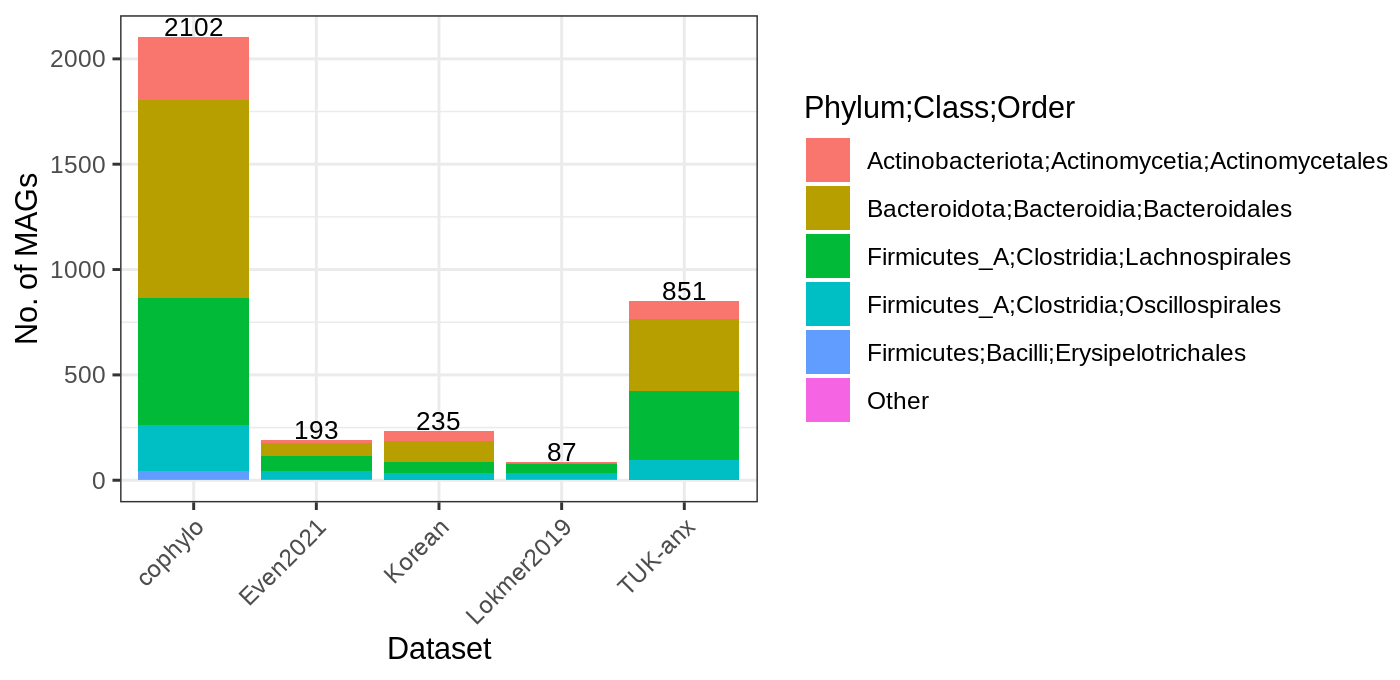

In [31]:
# by taxonomy
X = MAGs_f %>%
    summarize.(n = n.(),
               .by=c(Dataset))

MAGs_fs = MAGs_f %>%
    mutate.(total_MAGs = n.()) %>%    
    mutate.(perc = n.() / total_MAGs * 100,
            .by=c(Phylum, total_MAGs)) %>%
    mutate.(taxonomy = ifelse(perc < 1, 'Other', 
                              paste(Phylum, Class, Order, sep=';'))) 

p = MAGs_fs %>%
    summarize.(n = n.(),
               .by=c(Dataset, taxonomy))  %>%
    mutate.(taxonomy = gsub('[pco]__', '', taxonomy)) %>%
    ggplot(aes(Dataset, n)) +
    geom_bar(aes(fill=taxonomy), stat='identity') +
    geom_text(data=X, aes(label=n), vjust=-0.05, size=3.3) +
    scale_fill_discrete('Phylum;Class;Order') +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7,3.4)
plot(p)

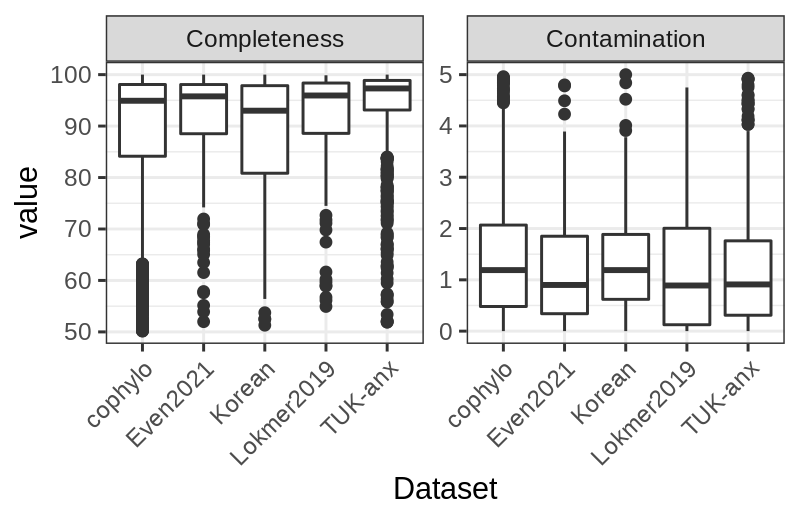

In [32]:
p = MAGs_f %>%
    select.(Dataset, Completeness, Contamination) %>%
    pivot_longer.(cols=c(-Dataset)) %>%
    ggplot(aes(Dataset, value)) +
    geom_boxplot() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,2.6)
plot(p)

# LLGenPhy

In [33]:
# filtering to just co-phylo species & samples with host-phylo data
MAGs_f = MAGs %>%
    inner_join.(samps, c('Sample')) %>%
    mutate.(spec = stringr::str_to_lower(gsub('^s__', '', Species))) %>%
    semi_join.(cophylo_spec %>%
                    mutate.(spec = stringr::str_to_lower(Species)),
               by=c('spec')) %>%
    rename.('genome' = Name) 
MAGs_f$genome %>% unique_n('MAGs')
MAGs_f

No. of unique MAGs: 3468 


genome,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,age_group,spec
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR2619708__metabat2__Low_034_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619708__metabat2__Low.034_sub.fna,88.55,0.96,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Eubacterium_R,s__Eubacterium_R sp000436835,ERR2619708,Lokmer2019,adult,eubacterium_r sp000436835
ERR2619709__metabat2__High_009_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__High.009_sub.fna,96.02,2.68,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__CAG-180,s__CAG-180 sp000432435,ERR2619709,Lokmer2019,adult,cag-180 sp000432435
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
V431__metabat2__Low_004,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/V431__metabat2__Low.004.fna,96.82,0.77,p__Actinobacteriota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium pseudocatenulatum,V431,cophylo,infant,bifidobacterium pseudocatenulatum
V439__metabat2__High_001,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round1/llg_output/drep/drep/dereplicated_genomes/V439__metabat2__High.001.fna,99.54,0.92,p__Actinobacteriota,c__Actinomycetia,o__Actinomycetales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium longum,V439,cophylo,infant,bifidobacterium longum


In [34]:
# MAGs per age group
MAGs_f %>%
    summarize.(n = n.(),
               .by=c(age_group))

age_group,n
<chr>,<int>
adult,2933
infant,535


### Summary

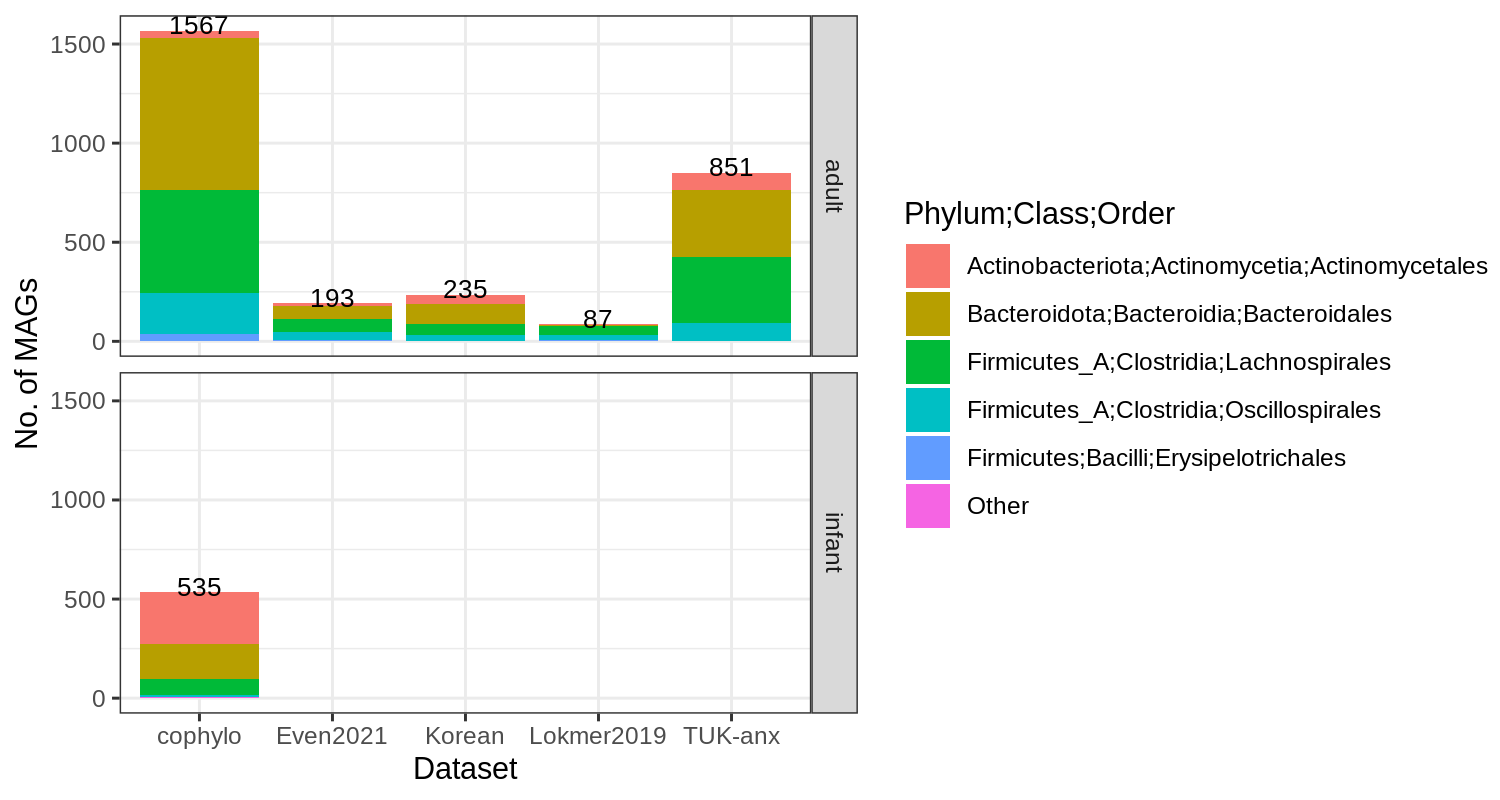

In [35]:
# plotting
X = MAGs_f %>%
    summarize.(n = n.(),
               .by=c(Dataset, age_group))

MAGs_fs = MAGs_f %>%
    mutate.(total_MAGs = n.()) %>%    
    mutate.(perc = n.() / total_MAGs * 100,
            .by=c(Phylum, total_MAGs)) %>%
    mutate.(taxonomy = ifelse(perc < 1, 'Other', 
                              paste(Phylum, Class, Order, sep=';'))) 

p = MAGs_fs %>%
    summarize.(n = n.(),
               .by=c(Dataset, taxonomy, age_group))  %>%
    mutate.(taxonomy = gsub('[pco]__', '', taxonomy)) %>%
    ggplot(aes(Dataset, n)) +
    geom_bar(aes(fill=taxonomy), stat='identity') +
    geom_text(data=X, aes(label=n), vjust=0.2, size=3.3) +
    scale_fill_discrete('Phylum;Class;Order') +
    facet_grid(age_group ~ .) +
    labs(y='No. of MAGs') +
    theme_bw()
p.dims(7.5,4)
plot(p)

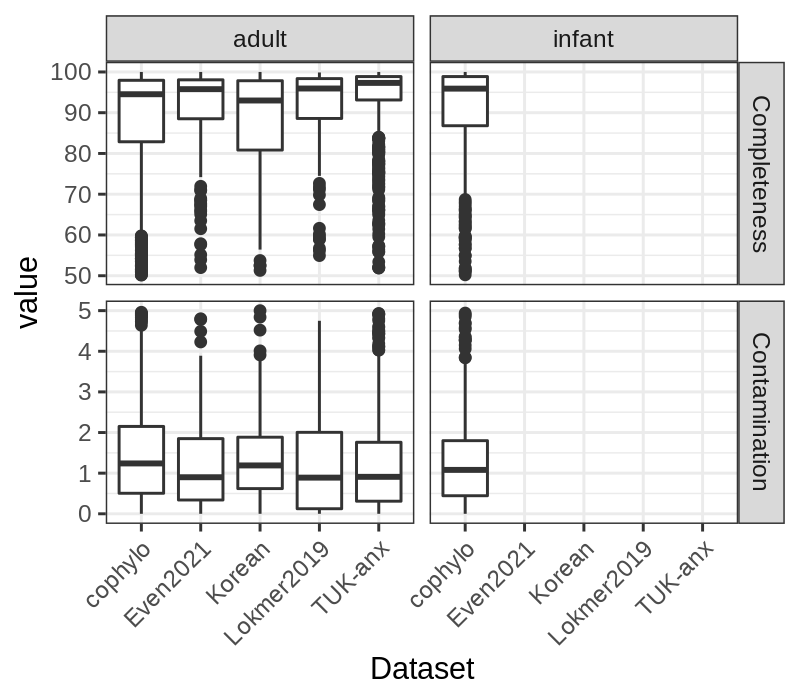

In [36]:
p = MAGs_f %>%
    select.(Dataset, age_group, Completeness, Contamination) %>%
    pivot_longer.(cols=c(-Dataset, -age_group)) %>%
    ggplot(aes(Dataset, value)) +
    geom_boxplot() +
    facet_grid(name ~ age_group, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,3.5)
plot(p)

### MAGs per `(species, sample)`

In [37]:
# summarizing
MAGs_fs = MAGs_f %>%
    summarize.(n = n.(),
               .by=c(Species, Sample)) 
MAGs_fs$n %>% summary_x('MAGs per species per host')
MAGs_fs %>% 
    filter.(n > 1) %>%
    summarize.(n = n.(),
               .by=c(Sample)) %>%
    .$n %>% summary_x('Species with multi MAGs per host')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
MAGs per species per host,1,1,1,1,1,1,0,0


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Species with multi MAGs per host,NA,NA,NA,NaN,NA,NA,NA,NA


## Adult

In [38]:
MAGs_ff = MAGs_f %>%
    filter.(age_group == 'adult') 
MAGs_ff$genome %>% unique_n('MAGs')
MAGs_ff

No. of unique MAGs: 2933 


genome,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,age_group,spec
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR2619708__metabat2__Low_034_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619708__metabat2__Low.034_sub.fna,88.55,0.96,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Eubacterium_R,s__Eubacterium_R sp000436835,ERR2619708,Lokmer2019,adult,eubacterium_r sp000436835
ERR2619709__metabat2__High_009_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__High.009_sub.fna,96.02,2.68,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__CAG-180,s__CAG-180 sp000432435,ERR2619709,Lokmer2019,adult,cag-180 sp000432435
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S1252_plate1_B01__maxbin2__High_011,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1252_plate1_B01__maxbin2__High_011.fna,72.84,2.42,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella copri,S1252_plate1_B01,Korean,adult,prevotella copri
S1252_plate1_B01__metabat2__High_002,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1252_plate1_B01__metabat2__High_002.fna,92.07,2.35,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,s__Alistipes putredinis,S1252_plate1_B01,Korean,adult,alistipes putredinis


In [39]:
# filtering
MAGs_fff = MAGs_ff %>%
    mutate.(MAGs_per_species = n.(),
            .by=c(Species)) %>%
    filter.(MAGs_per_species >= 10)
MAGs_fff

genome,Fasta,Completeness,Contamination,Phylum,Class,Order,Family,Genus,Species,Sample,Dataset,age_group,spec,MAGs_per_species
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
ERR2619708__metabat2__Low_034_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619708__metabat2__Low.034_sub.fna,88.55,0.96,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Eubacterium_R,s__Eubacterium_R sp000436835,ERR2619708,Lokmer2019,adult,eubacterium_r sp000436835,70
ERR2619709__metabat2__High_009_sub,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/lokmeretal2019/round1/llg_output/drep/drep/dereplicated_genomes/ERR2619709__metabat2__High.009_sub.fna,96.02,2.68,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__CAG-180,s__CAG-180 sp000432435,ERR2619709,Lokmer2019,adult,cag-180 sp000432435,142
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
S1252_plate1_B01__maxbin2__High_011,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1252_plate1_B01__maxbin2__High_011.fna,72.84,2.42,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella copri,S1252_plate1_B01,Korean,adult,prevotella copri,184
S1252_plate1_B01__metabat2__High_002,/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/koreans/round1/llg_output/drep/drep/dereplicated_genomes/S1252_plate1_B01__metabat2__High_002.fna,92.07,2.35,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,s__Alistipes putredinis,S1252_plate1_B01,Korean,adult,alistipes putredinis,184


In [40]:
# summary
MAGs_fff$genome %>% unique_n('MAGs')
MAGs_fff$Species %>% unique_n('Species')
df.dims(50)
MAGs_fff %>% 
    summarize.(n = n.(), .by=c(Species)) %>%
    arrange.(-n)
df.dims()

No. of unique MAGs: 2911 
No. of unique Species: 34 


Species,n
<chr>,<int>
s__Agathobacter rectalis,324
s__Phocaeicola vulgatus,298
s__Bacteroides uniformis,216
s__Alistipes putredinis,184
s__Prevotella copri,184
s__CAG-180 sp000432435,142
s__Agathobacter faecis,133
s__Lachnospira eligens_B,129
s__Ruminococcus_D bicirculans,106


In [41]:
# writing table
D = file.path(work_dir, 'cophylo_species', 'adult', 'llgenphy')
make_dir(D)
F = file.path(D, 'genomes.tsv')
MAGs_fff %>%
    rename.('Name' = genome) %>%
    mutate.(Clade = gsub('^s__', '', Species)) %>%
    write_table(F)

Directory already exists: /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR//cophylo_species/adult/llgenphy 
File written: /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR//cophylo_species/adult/llgenphy/genomes.tsv 


### Config

In [42]:
F = file.path(work_dir, 'cophylo_species', 'adult', 'llgenphy', 'config.yaml')
cat_file(F)

# table with genome --> fasta_file information
samples_file: /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/cophylo_species/adult/llgenphy/genomes.tsv

# output location
output_dir: /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/cophylo_species/adult/llgenphy/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# software parameters
# Use "Skip" to skip any of these steps. If no params for rule, use ""
params:
  ionice: -c 3
  # reference download
  ref_download: --max-outgroups 1 --max-refs 0 --clade-level species --min-completion 70 --max-contamination 5
  # gene annotation
  gene_call:
    prodigal: ""
  # genome phylogeny (requires annotation)
  phylophlan:
    config: --map_dna diamond --db_aa diamond --map_aa diamond
            --msa mafft --trim trimal --tree1 fasttree --tree2 raxml
    accu

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/ll_pipelines/llgenphy
$ screen -L -S llgenphy-cophylo ./snakemake_sge.sh /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/cophylo_species/adult/llgenphy/config.yaml 50 --notemp -F
```

# --WAITING--

### Summary

In [ ]:
D = file.path(work_dir, 'cophylo_species', 'adult', 'llgenphy', 'phylogeny', 'phylophlan')
F = list_files(D, '*_resolved_rn.nwk')
F %>% length

In [ ]:
# reading trees
trees = F %>%
    lapply(ape::read.tree)
names(trees) = F %>% basename %>% gsub('_resolved_rn.nwk$', '', .)
trees %>% length

In [ ]:
# tips per tree
tips = trees %>% 
    lapply(function(x) x$tip.label[!grepl('^REF', x$tip.label)] %>% length) %>% 
    unlist %>% as.data.frame
colnames(tips) = c('n_tips')
tips$clade = rownames(tips)
rownames(tips) = NULL
summary_x(tips$n_tips)
tips

In [ ]:
# trees with tips < n_tip cutoff
tips %>%
    filter(n_tips < 10)

In [ ]:
# all trees have an outgroup?
has_ref = function(tree){
    tree$tip.label %>% sapply(function(x) grepl('^REF', x)) %>% any
}
trees %>% lapply(has_ref) %>% unlist %>% table

In [ ]:
# has reference?
has_ref = function(name, trees){
    x = trees[[name]] %>% .$tip.label %>% sapply(function(x) grepl('^REF', x)) %>% any
    return(c(name, x))
}
df_trees = trees %>% names %>% 
    lapply(has_ref, trees=trees) %>% 
    do.call(rbind, .) %>%
    as.data.frame
colnames(df_trees) = c('clade', 'has_outgroup')
df_trees

In [ ]:
# lacking outgroup?
df_trees %>%
    filter.(has_outgroup == FALSE)

# sessionInfo

In [112]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/envs/tidyverse-ecoPhy3/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.9 tidytable_0.6.3   data.table_1.14.0 ggplot2_3.3.5    
[5] tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] pillar_1.6.1      compiler_4.1.0    base64enc_0.1-3   tools_4.1.0      
 [5] digest_0.6.27     uuid_0.1-4 